In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


### Bejaia Dataset - PCA

* reading the data

In [2]:
bejaia_df = pd.read_excel('BR_dataset.xlsx')

features = [
    "Temperature", "RH", "Ws", "Rain", "FWI",
    "FFMC", "DMC", "DC", "ISI", "BUI"
]

X_bejaia = bejaia_df[features]
y_bejaia = bejaia_df["Classes"]
y_bejaia = y_bejaia.str.strip()


* standardising the data (since the variable have different scales)

In [3]:
scaler = StandardScaler()
X_b_scaled = scaler.fit_transform(X_bejaia)

* computing the covariance matrix to understand feature relationships.

In [4]:
cov_matrix = np.cov(X_b_scaled.T)
cov_matrix

array([[ 1.00826446, -0.66560634, -0.22991959, -0.49097161,  0.61339522,
         0.75460858,  0.54596452,  0.53724169,  0.66935775,  0.54669084],
       [-0.66560634,  1.00826446,  0.24780565,  0.33188297, -0.4800018 ,
        -0.65855087, -0.34994857, -0.31686851, -0.59125636, -0.34102795],
       [-0.22991959,  0.24780565,  1.00826446,  0.35220818,  0.02988153,
        -0.21281331,  0.03972001,  0.10005104, -0.03959025,  0.06272636],
       [-0.49097161,  0.33188297,  0.35220818,  1.00826446, -0.29533518,
        -0.57821543, -0.26756381, -0.28599584, -0.36945371, -0.27419825],
       [ 0.61339522, -0.4800018 ,  0.02988153, -0.29533518,  1.00826446,
         0.68113615,  0.90921174,  0.87710046,  0.95186374,  0.90785884],
       [ 0.75460858, -0.65855087, -0.21281331, -0.57821543,  0.68113615,
         1.00826446,  0.61354128,  0.57997455,  0.79661523,  0.60567119],
       [ 0.54596452, -0.34994857,  0.03972001, -0.26756381,  0.90921174,
         0.61354128,  1.00826446,  0.97014455

* calculating eigenvalues and eigenvectors (To determine principal components)

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [6]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
pd.Series(eigenvalues).sort_values(ascending=False).head()


0    6.091419
1    1.751523
2    0.782104
3    0.614181
4    0.336787
dtype: float64

* Sorting the eigen values in descending order

In [7]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [8]:

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
np.cumsum(explained_variance_ratio)


array([0.60414897, 0.77786559, 0.85543495, 0.91634965, 0.94975225,
       0.97685387, 0.99609156, 0.99958912, 0.99995923, 1.        ])

* Proecting the data into 2 dimensions (for visualisation)

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_b_scaled)

In [10]:
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Fire"] = bejaia_df["Classes"].values
pca_df.head()

,PC1,PC2,Fire
0,-1.626881,-0.610444,not fire
1,-1.788498,-1.190143,not fire
2,-4.220485,3.757451,not fire
3,-3.992279,0.695093,not fire
4,-2.229102,-0.149775,not fire


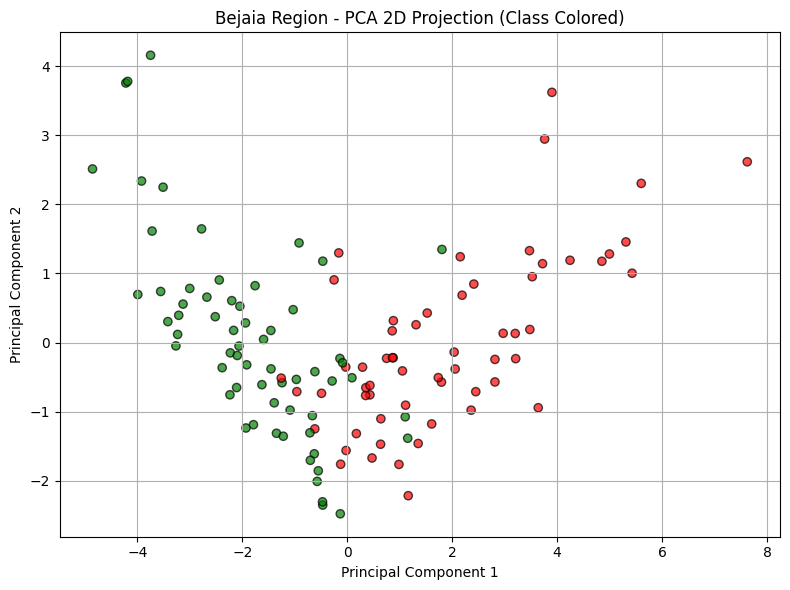

In [11]:
colors = ['red' if cls.strip().lower() == 'fire' else 'green' for cls in y_bejaia]

# Plot the PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, edgecolor='k')
plt.title("Bejaia Region - PCA 2D Projection (Class Colored)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
# plt.savefig("bejaia_pca_class_colored.png")
plt.show()


* Scree Plot: To show the variance explained by each principal component.

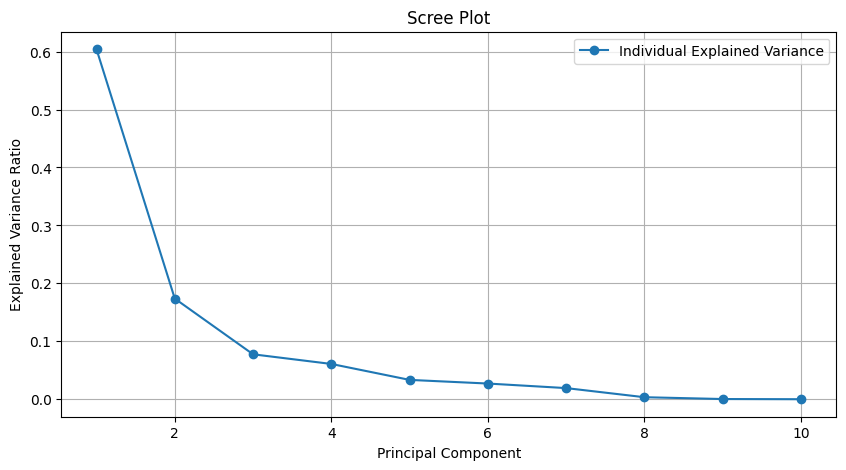

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()


* Biplot: To visualize data in the reduced dimensional space.

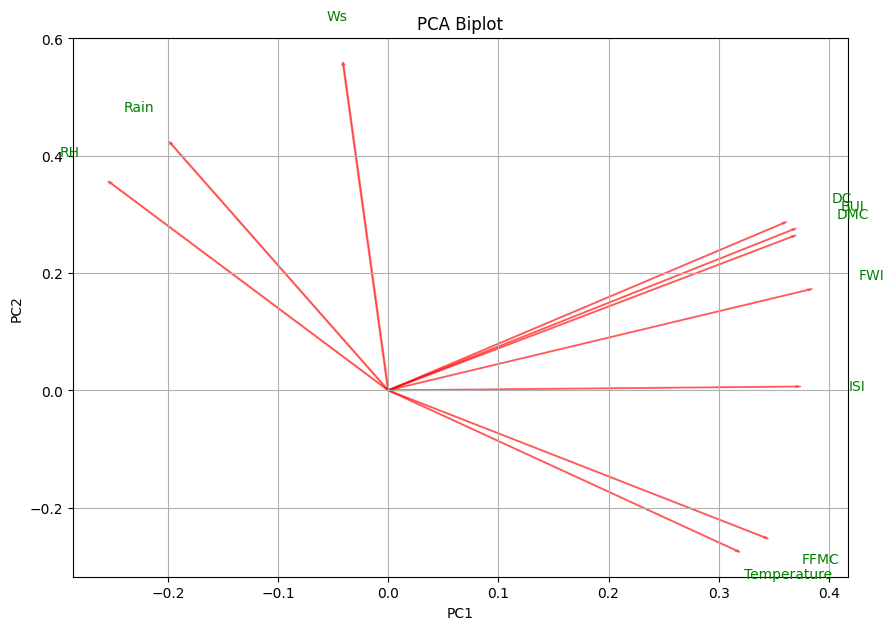

In [13]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.figure(figsize=(10, 7))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title("PCA Biplot")
    plt.show()

biplot(X_pca, np.transpose(pca.components_), labels=X_bejaia.columns)


* Cumulative variance plot: To decide the number of components to retain.

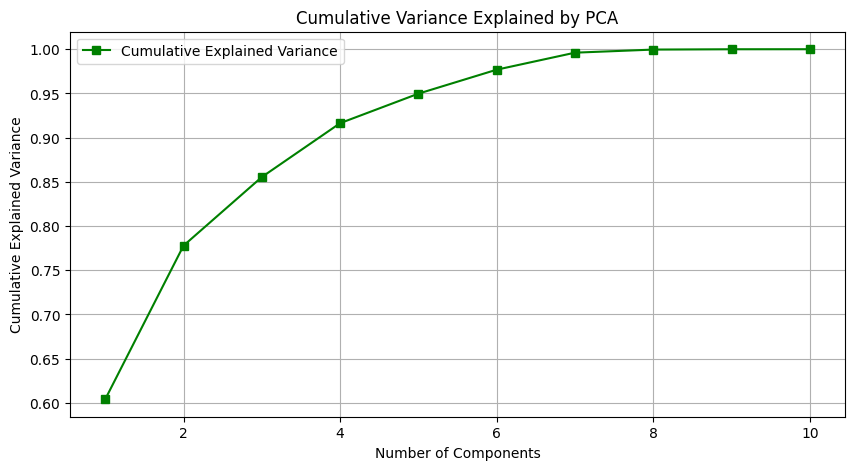

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 's-', color='green', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA')
plt.grid(True)
plt.legend()
plt.show()


### Sidi Bel Abbes Dataset - PCA


* reading the data
* standardising the data (since the variable have different scales)
* computing the covariance matrix to understand feature relationships.


In [15]:
sbar_df = pd.read_excel('SBAR_dataset.xlsx')

features = [
    "Temperature", "RH", "Ws", "Rain", "FWI",
    "FFMC", "DMC", "DC", "ISI", "BUI"
]
X_sbar = sbar_df[features]
y_sbar = sbar_df["Classes"]


In [16]:
scaler = StandardScaler()
X_sbar_scaled = scaler.fit_transform(X_sbar)

In [17]:
cov_matrix1 = np.cov(X_sbar_scaled.T)
cov_matrix1

array([[ 1.00826446, -0.60325396, -0.26034165, -0.13078982,  0.50472739,
         0.57785816,  0.39296862,  0.28685772,  0.54269414,  0.37079517],
       [-0.60325396,  1.00826446,  0.14260489,  0.15025833, -0.60936926,
        -0.65087498, -0.38218934, -0.26789433, -0.69805655, -0.36378386],
       [-0.26034165,  0.14260489,  1.00826446, -0.14089497,  0.10858554,
        -0.0195665 ,  0.02900272,  0.01728175,  0.13481793,  0.02998583],
       [-0.13078982,  0.15025833, -0.14089497,  1.00826446, -0.4139572 ,
        -0.51471692, -0.35131081, -0.34767259, -0.41689384, -0.36101965],
       [ 0.50472739, -0.60936926,  0.10858554, -0.4139572 ,  1.00826446,
         0.72538757,  0.85806613,  0.71978364,  0.92342077,  0.8502068 ],
       [ 0.57785816, -0.65087498, -0.0195665 , -0.51471692,  0.72538757,
         1.00826446,  0.58610367,  0.48463016,  0.75959596,  0.58179359],
       [ 0.39296862, -0.38218934,  0.02900272, -0.35131081,  0.85806613,
         0.58610367,  1.00826446,  0.88941187

* calculating eigenvalues and eigenvectors (To determine principal components)
* Sorting the eigen values in descending order


In [18]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix1)
pd.Series(eigenvalues).sort_values(ascending=False).head()

0    5.615481
1    1.509635
2    1.128550
3    0.791998
4    0.413192
dtype: float64

In [19]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
np.cumsum(explained_variance_ratio)

array([0.5569452 , 0.70667134, 0.81860132, 0.89715196, 0.93813244,
       0.96468662, 0.98746353, 0.99746262, 0.9994582 , 1.        ])

* Proecting the data into 2 dimensions (for visualisation)


In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sbar_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Fire"] = bejaia_df["Classes"].values
pca_df.head()

,PC1,PC2,Fire
0,-2.991409,0.307192,not fire
1,-3.663014,0.221362,not fire
2,-3.825756,-0.653729,not fire
3,-1.890615,0.040999,not fire
4,-1.744075,0.353630,not fire


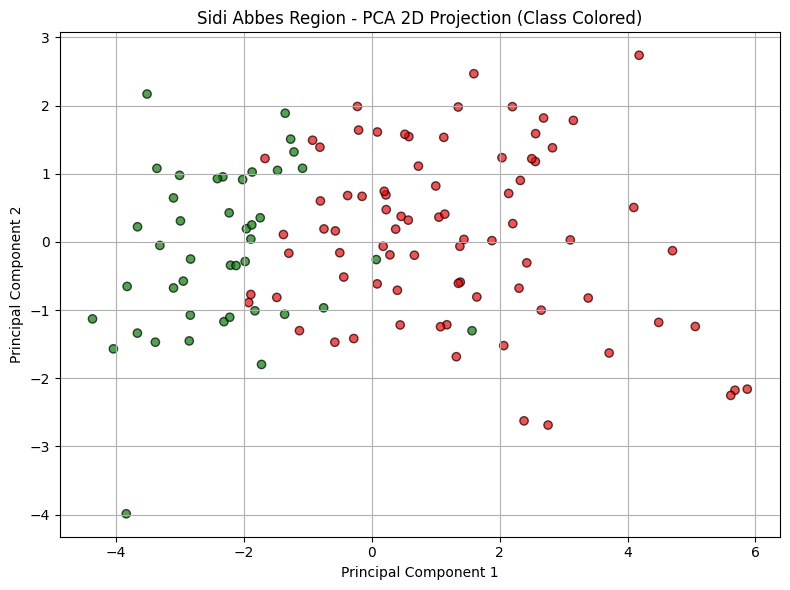

In [21]:
colors = ['red' if cls.strip().lower() == 'fire' else 'green' for cls in y_sbar]

# Plot the PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, edgecolor='k')
plt.title("Sidi Abbes Region - PCA 2D Projection (Class Colored)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
# plt.savefig("bejaia_pca_class_colored.png")
plt.show()

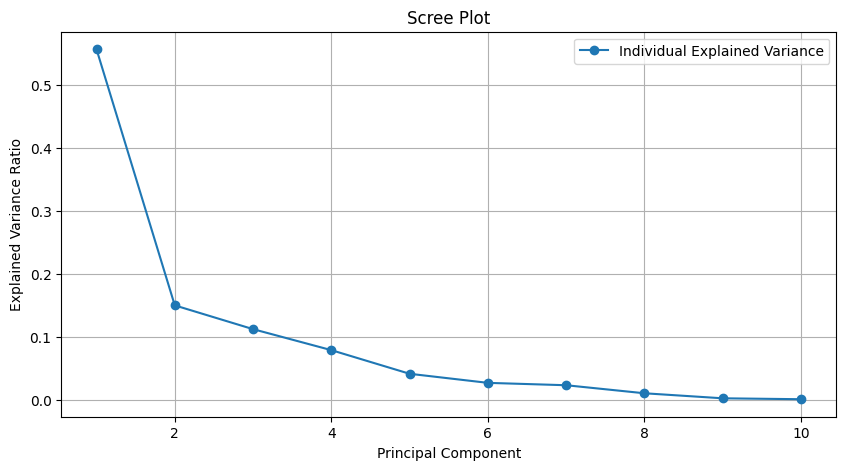

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()

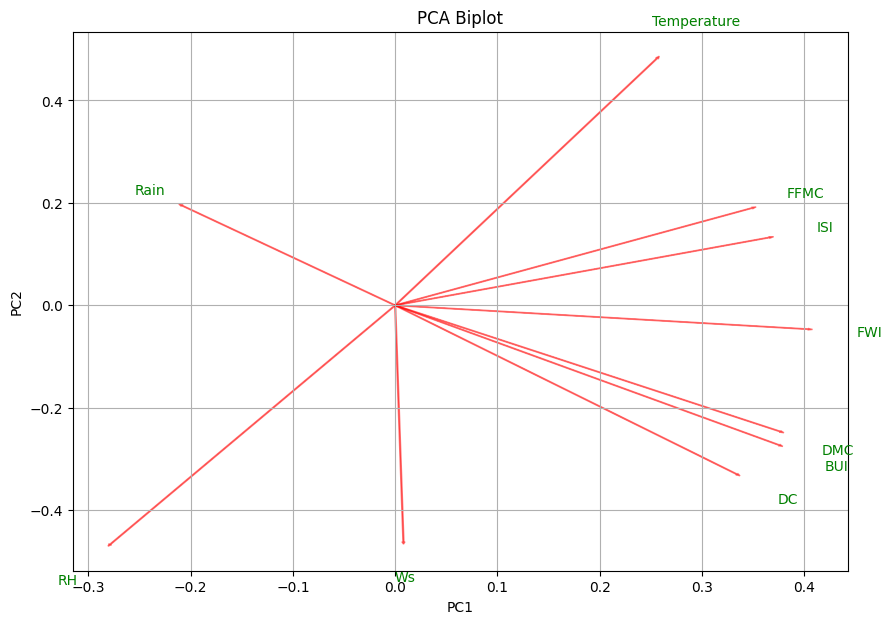

In [23]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.figure(figsize=(10, 7))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title("PCA Biplot")
    plt.show()

biplot(X_pca, np.transpose(pca.components_), labels=X_bejaia.columns)

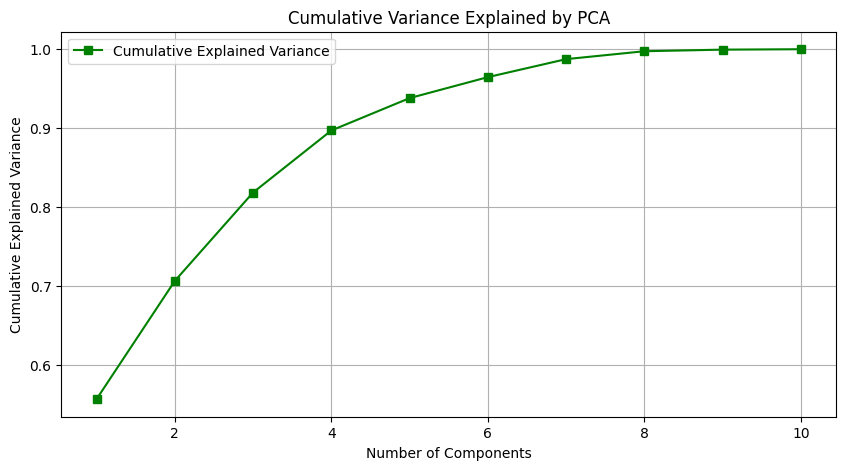

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 's-', color='green', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA')
plt.grid(True)
plt.legend()
plt.show()